In [3]:
import numpy as np
import pandas as pd
import umap.umap_ as umap
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns

trainin = pd.read_csv('data/train_in.csv', delimiter = ',', header=None)
trainout = pd.read_csv('data/train_out.csv', delimiter = ',', header=None)
testin = pd.read_csv('data/test_in.csv', delimiter = ',', header=None)
testout = pd.read_csv('data/test_out.csv', delimiter = ',', header=None)

In [4]:
trainin['Label'] = trainout
average = trainin.groupby(['Label']).mean()

train = trainin.iloc[:, :-1]
print(trainout[0])

0       6
1       5
2       4
3       7
4       3
       ..
1702    8
1703    9
1704    7
1705    9
1706    8
Name: 0, Length: 1707, dtype: int64


In [5]:
def group_and_calc_dist(data, labels, no1, no2):
    """
    Takes data (train or test in) and labels (train or test out) in a dataframe 
    and two numbers. Calculates the distance between the centers of those two numbers.
    """
    data['Label'] = labels
    average = data.groupby(['Label']).mean()
    dist = np.linalg.norm(average.iloc[[no1]].to_numpy() - average.iloc[[no2]].to_numpy())
    
    return dist

plotlist = []
for a in range(0, 10):
    subplotls = []
    for b in range(0, 10):
        subplotls.append(group_and_calc_dist(trainin, trainout, a, b))
        print('Number one: ', a, ' Number two: ', b, ' Distance: ', group_and_calc_dist(trainin, trainout, a, b))
    plotlist.append(subplotls)
       

Number one:  0  Number two:  0  Distance:  0.0
Number one:  0  Number two:  1  Distance:  14.44960796590658
Number one:  0  Number two:  2  Distance:  9.334555870229643
Number one:  0  Number two:  3  Distance:  9.143733671882783
Number one:  0  Number two:  4  Distance:  10.769844437633486
Number one:  0  Number two:  5  Distance:  7.519296259597183
Number one:  0  Number two:  6  Distance:  8.154443125778972
Number one:  0  Number two:  7  Distance:  11.864555054634078
Number one:  0  Number two:  8  Distance:  9.907901737320392
Number one:  0  Number two:  9  Distance:  11.488874937417041
Number one:  1  Number two:  0  Distance:  14.44960796590658
Number one:  1  Number two:  1  Distance:  0.0
Number one:  1  Number two:  2  Distance:  10.125322577096668
Number one:  1  Number two:  3  Distance:  11.733232901831071
Number one:  1  Number two:  4  Distance:  10.173786431281787
Number one:  1  Number two:  5  Distance:  11.118800407467436
Number one:  1  Number two:  6  Distance:  10

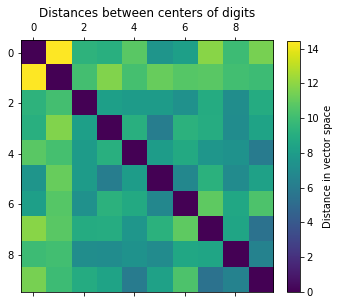

In [25]:
plt.figure(figsize=(5, 8))
plt.matshow(plotlist, fignum = 1)
plt.title("Distances between centers of digits")
plt.colorbar(fraction = .045, label = 'Distance in vector space')
#plt.xticks(ticks = labels = [0,1,2,3,4,5,6,7,8,9])
plt.show()

In [27]:
pca = PCA(n_components = 2)
youmap = umap.UMAP()
tsne = TSNE()

tsnereduc = tsne.fit_transform(trainin)
umapreduc = youmap.fit_transform(trainin)
pcareduc = pca.fit_transform(trainin)

Text(0.5, 1.0, 'TSNE Dimension Reduction')

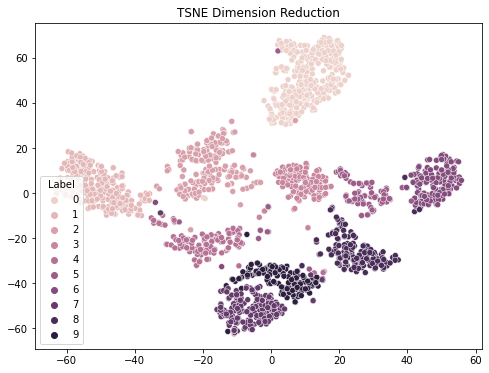

In [54]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x = tsnereduc[:, 0], y = tsnereduc[:, 1], hue = trainin["Label"], legend = 'full')
plt.title('TSNE Dimension Reduction')

Text(0.5, 1.0, 'Umap Dimension Reduction')

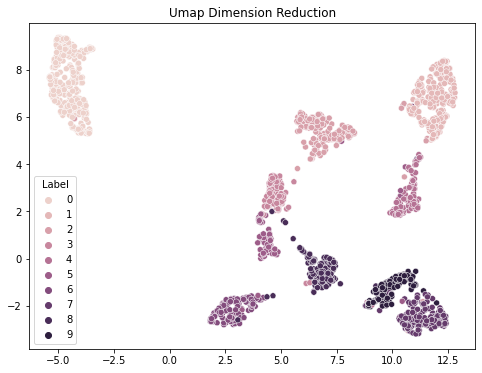

In [55]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x = umapreduc[:, 0], y = umapreduc[:, 1], hue = trainin["Label"], legend = 'full')
plt.title("Umap Dimension Reduction")

Text(0.5, 1.0, 'PCA Dimension Reduction')

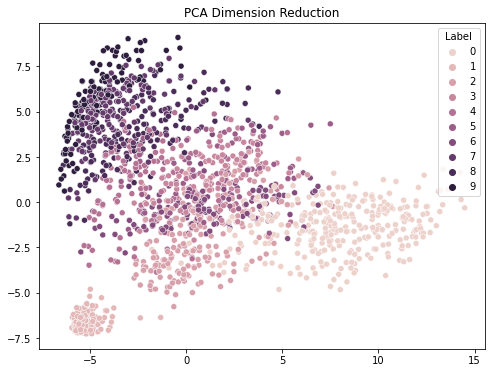

In [56]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x = pcareduc[:, 0], y = pcareduc[:, 1], hue = trainin["Label"], legend = 'full')
plt.title('PCA Dimension Reduction')

In [89]:
predstest = []
predstrain = []

for index, measure in train.iterrows():
    disttrain = 1000
    notrain = 1000
    for index2, mean in average.iterrows():
        currentdisttr = np.linalg.norm(mean.to_numpy() - measure.to_numpy())
        if currentdisttr < disttrain:
            disttrain = currentdisttr
            notrain = index2
    predstrain.append(notrain)
    
for index, measure in testin.iterrows():
    disttest = 1000
    notest = 1000
    for index2, mean in average.iterrows():
        currentdistte = np.linalg.norm(mean.to_numpy() - measure.to_numpy())
        if currentdistte < disttest:
            disttest = currentdistte
            notest = index2
    predstest.append(notest)
    
traincorrect = 0
testcorrect = 0
traintotal = 0
testtotal = 0
i = 0
j = 0

for pred in predstrain:
    if trainout[0][i] == pred:
        traincorrect += 1
    traintotal += 1
    i += 1
    
for pred in predstest:
    if testout[0][j] == pred:
        testcorrect += 1
    testtotal += 1
    j += 1
    
print("Train percentage correct: ", traincorrect/traintotal*100)
print("Test percentage correct: ", testcorrect/testtotal*100)

Train percentage correct:  86.35032220269478
Test percentage correct:  80.4


In [105]:
knn = KNeighborsClassifier()
knn.fit(trainin.iloc[:, :-1], trainout[0])
predictions = knn.predict(testin)

knncorrect = 0
knntotal = 0
k = 0
for pred in predictions:
    if testout[0][k] == pred:
        knncorrect += 1
    knntotal += 1
    k += 1
print("KNN percentage correct: ", knncorrect/knntotal*100)

KNN percentage correct:  90.8


In [110]:
lbls = [0,1,2,3,4,5,6,7,8,9]
naivematrix = confusion_matrix(predstest, testout[0])
knnmatrix = confusion_matrix(predictions, testout[0])

matrix1 = ConfusionMatrixDisplay(confusion_matrix = naivematrix, display_labels = lbls)
matrix2 = ConfusionMatrixDisplay(confusion_matrix = knnmatrix, display_labels = lbls)

Text(0.5, 1.0, 'Naive Confusion Matrix')

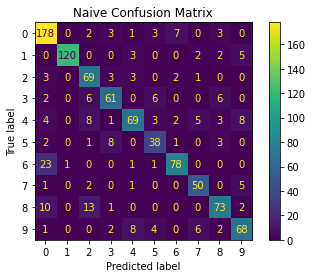

In [117]:
matrix1.plot()
plt.title("Naive Confusion Matrix")

Text(0.5, 1.0, 'KNN Confusion Matrix')

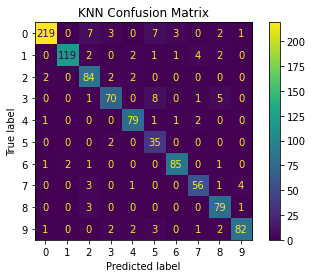

In [116]:
matrix2.plot()
plt.title("KNN Confusion Matrix")